> # Lab - 4 Tidying, Cleaning, Imputation, and Outlier Detection

**Student Name:** `Hasyashri Bhatt`

**Student Number:**`9028501`

**Course:**`Machine Learning Programming(PROG8245)`

**Reference:** For the coding understanding and reference I used chatgpt,copilot ,https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/


----

# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [131]:
import pandas as pd
import numpy as np

### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [132]:
pew_df = pd.read_csv('./CSVs/pew-raw.csv')

2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [133]:
# Display the first 5 rows using head()
pew_df.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


In [134]:
# Display the last 5 rows using tail()
pew_df.tail()


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


In [135]:
# Display the first 3 rows using iloc
pew_df.iloc[:3]

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58


In [136]:
# Display few rows  using loc
pew_df.loc[:5]

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486


***What does not seem right in the above dataframe?***

- Column names represent income ranges (values), not variables.

- Not tidy: Variables are stored in columns.

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [137]:
pew_tidy = pd.melt(pew_df, id_vars=['religion'], var_name='income', value_name='count')
pew_tidy.head()

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15


### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [138]:
billboard_df = pd.read_csv('./CSVs/billboard.csv', encoding='unicode_escape')

2. Observe the first few rows of the dataset.

In [139]:
billboard_df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***What is wrong with the above dataset?***

The dataset is not tidy because week numbers are stored as columns instead of as values in a single column, and there are many missing values.

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [140]:
billboard_melted = pd.melt(
    billboard_df,
    id_vars=['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked'],
    var_name='week',
    value_name='rank'
)
billboard_melted.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [141]:
# Remove non-numeric characters from the 'week' column and convert to integer
billboard_melted['week'] = billboard_melted['week'].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))) if pd.notnull(x) else pd.NA).astype('Int64')
billboard_melted.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0


5. Now let's inspect the ***Week*** column in the dataframe.

In [142]:
# Display unique values and basic statistics for the 'week' column
print("Unique week numbers:", billboard_melted['week'].unique())
print("Week column statistics:")


Unique week numbers: <IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
Length: 76, dtype: Int64
Week column statistics:


In [143]:
billboard_melted['week'].describe()

count      24092.0
mean          38.5
std      21.937866
min            1.0
25%          19.75
50%           38.5
75%          57.25
max           76.0
Name: week, dtype: Float64

Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.

In [144]:
# Calculate the date at which the song achieved the given rank for each row
# The date is: date.entered + (week - 1) * 7 days

billboard_melted['date'] = pd.to_datetime(billboard_melted['date.entered']) + pd.to_timedelta((billboard_melted['week'] - 1).fillna(0), unit='D') * 7
billboard_melted.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0,1999-10-23
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0,2000-08-05


*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

The problem with the calculation above is that it does not handle missing or NaN values in the `week` column.If 'week' is missing, the calculation (billboard_melted['week'] - 1) * 7 will result in a missing value for the 'date' column. This means that for rows where 'week' is missing, the computed 'date' will also be missing, which may not be desirable depending on your analysis. Additionally, if the 'week' column contains invalid or unexpected values, the calculation could produce incorrect dates.

7. Let's only keep necessary columns

In [145]:
# Keep only the necessary columns in billboard_melted
billboard_melted = billboard_melted[['year', 'artist.inverted', 'track', 'week', 'rank', 'date']]
billboard_melted.head()

,year,artist.inverted,track,week,rank,date
0,2000,Destiny's Child,Independent Women Part I,1,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",1,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,1,71.0,1999-10-23
3,2000,Madonna,Music,1,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),1,57.0,2000-08-05


8. How to rename your columns?

In [146]:
billboard_melted = billboard_melted.rename(columns={
    'artist.inverted': 'artist',
    'track': 'song_title',
    'week': 'chart_week',
    'rank': 'chart_rank',
    'date': 'chart_date'
})


Display the dataframe

In [147]:
billboard_melted.head()

,year,artist,song_title,chart_week,chart_rank,chart_date
0,2000,Destiny's Child,Independent Women Part I,1,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",1,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,1,71.0,1999-10-23
3,2000,Madonna,Music,1,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),1,57.0,2000-08-05


In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

Checking missing values

In [148]:
billboard_melted.isnull().sum()

year              0
artist            0
song_title        0
chart_week        0
chart_rank    18785
chart_date        0
dtype: int64

Dropped missing values using .dropna() method

In [149]:
# Drop rows with NaN values in billboard_melted and observe the cleaned dataset
billboard_cleaned = billboard_melted.dropna()
billboard_cleaned.isnull().sum()

year          0
artist        0
song_title    0
chart_week    0
chart_rank    0
chart_date    0
dtype: int64

## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [150]:
df_cars = pd.read_csv('./CSVs/cars.csv', sep=';')
df_cars

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
...,...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
403,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
404,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
405,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


First Row seems to be the datatype, we need to remove it

In [151]:
# Remove the first row which contains datatype information
df_cars = df_cars.iloc[1:].reset_index(drop=True)
df_cars

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


In [152]:
df_cars.shape

(406, 9)

Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [153]:
df_cars.isnull().sum()

Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [154]:
# Calculate the percentage of missing values in each column
missing_percent = (df_cars.isnull().sum().sum()/ len(df_cars)) 
print(missing_percent)

0.017241379310344827


Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

Lets also check dropping the columns

In [155]:
# Drop columns in df_cars that contain any missing values
df_cars_dropcols = df_cars.dropna(axis=1)
df_cars_dropcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car           406 non-null    object
 1   Cylinders     406 non-null    object
 2   Acceleration  406 non-null    object
 3   Model         406 non-null    object
 4   Origin        406 non-null    object
dtypes: object(5)
memory usage: 16.0+ KB


Let's observe how many columns we lost

In [156]:
# Compare the number of columns before and after dropping columns with missing values
original_cols = df_cars.shape[1]
after_drop_cols = df_cars_dropcols.shape[1]
print(f"Original number of columns: {original_cols}")
print(f"Number of columns after dropping: {after_drop_cols}")
print(f"Number of columns lost: {original_cols - after_drop_cols}")

Original number of columns: 9
Number of columns after dropping: 5
Number of columns lost: 4


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

In [157]:
# Fill missing values in the 'MPG' column with 0
df_cars['MPG'] = df_cars['MPG'].fillna(0)
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,0,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,0,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

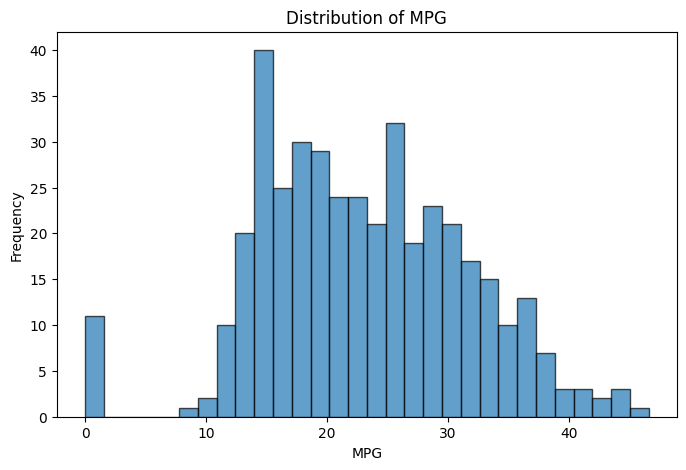

In [158]:
import matplotlib.pyplot as plt

# Convert 'MPG' column to numeric, coercing errors to NaN
df_cars['MPG'] = pd.to_numeric(df_cars['MPG'], errors='coerce')

# Plot the distribution of the MPG column
plt.figure(figsize=(8, 5))
plt.hist(df_cars['MPG'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

In [159]:
# Convert 'MPG' column to numeric with nullable Int64 dtype, coercing errors to NaN

df_cars['MPG'] = pd.to_numeric(df_cars['MPG'], errors='coerce')
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           406 non-null    object 
 1   MPG           406 non-null    float64
 2   Cylinders     406 non-null    object 
 3   Displacement  405 non-null    object 
 4   Horsepower    404 non-null    object 
 5   Weight        405 non-null    object 
 6   Acceleration  406 non-null    object 
 7   Model         406 non-null    object 
 8   Origin        406 non-null    object 
dtypes: float64(1), object(8)
memory usage: 28.7+ KB


Now let's see what is the mean of the MPG column

In [160]:
# Calculate and display the mean of the 'MPG' column
mpg_mean = df_cars['MPG'].mean()
print("Mean of MPG column:", mpg_mean)

Mean of MPG column: 22.925615763546798


We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [161]:
# Impute missing values in the 'MPG' column with the mean
df_cars['MPG'] = df_cars['MPG'].fillna(mpg_mean)
# Display the first few rows of the DataFrame after imputation
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,0.0,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,0.0,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [162]:
# Fit the SimpleImputer to the 'Horsepower' column to compute the mean (or other strategy)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(df_cars[['Horsepower']])


,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


After fitting, `imputer.statistics_` will contain the computed mean of the `Horsepower` column.
This does not change your DataFrame yet; it just computes and stores the mean for later use.
Now we can then use `imputer.transform()` to fill missing values in the data with this mean.

In [163]:
# Transform the 'Horsepower' column in df_cars by imputing missing values with the mean
df_cars['Horsepower'] = imputer.transform(df_cars[['Horsepower']])
df_cars['Horsepower'].head(10)

0    130.000000
1    103.143564
2    150.000000
3    150.000000
4    140.000000
5    103.143564
6    220.000000
7    215.000000
8    225.000000
9    190.000000
Name: Horsepower, dtype: float64

## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

Outliers are unusual values that can affect your analysis, so it’s important to detect and handle them properly.

1. Importing necessary Libraries for the program

In [164]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt



2. Loading the `diabetes dataset` from sklearn datasets

In [165]:
# Load the dataset
diabetics = load_diabetes()

3. Saving dataset into the dataframe to process further in notebook

In [166]:
# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name

4. Show first five row of the dataset to get to know more about it

In [167]:
#Inspect the first few rows of the dataframe
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Describing statistics using `.describe()`of the dataset and included in the below table

In [168]:
#summary statistics of the dataframe
df_diabetics.describe().round(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14


### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

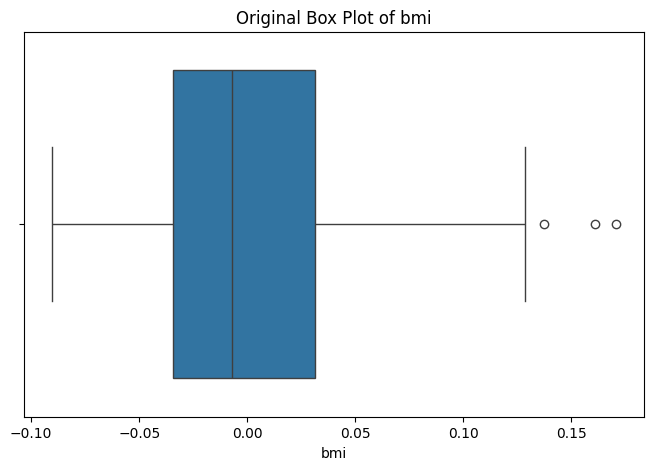

In [169]:
# Step 1: Show the original box plot for 'bmi'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_diabetics['bmi'])
plt.title('Original Box Plot of bmi')
plt.xlabel('bmi')
plt.show()



**Summary:-**

The first box plot shows the range of BMI (Body Mass Index) values for people in the dataset. Most people have BMI values in the middle part of the plot, but there are a few people with much higher BMI, which are shown as points far from the rest. These are called "outliers.

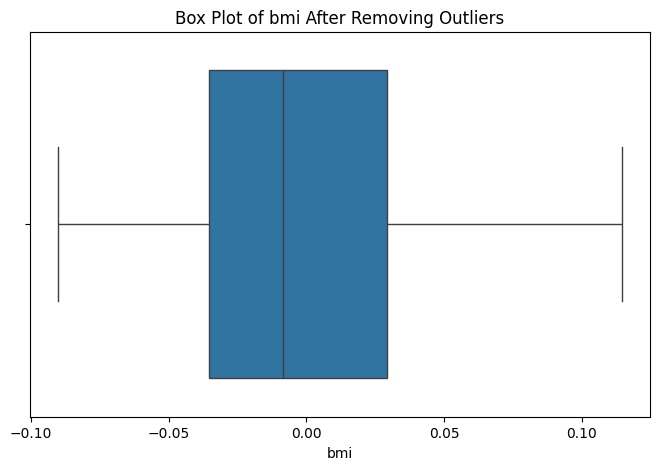

In [170]:
# Step 2: Remove outliers and show the box plot after removal
threshold_value = 0.12
filtered_df = df_diabetics[df_diabetics['bmi'] <= threshold_value]

plt.figure(figsize=(8, 5))
sns.boxplot(x=filtered_df['bmi'])
plt.title('Box Plot of bmi After Removing Outliers')
plt.xlabel('bmi')
plt.show()

**summary:-**

 After removing these unusually high values above, the second box plot shows the BMI range for the rest of the people. This makes it easier to see what is normal for most people, without the extreme cases affecting the results.

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

let's take two variable called `bmi` and `bp`to show outlier in the dataset 

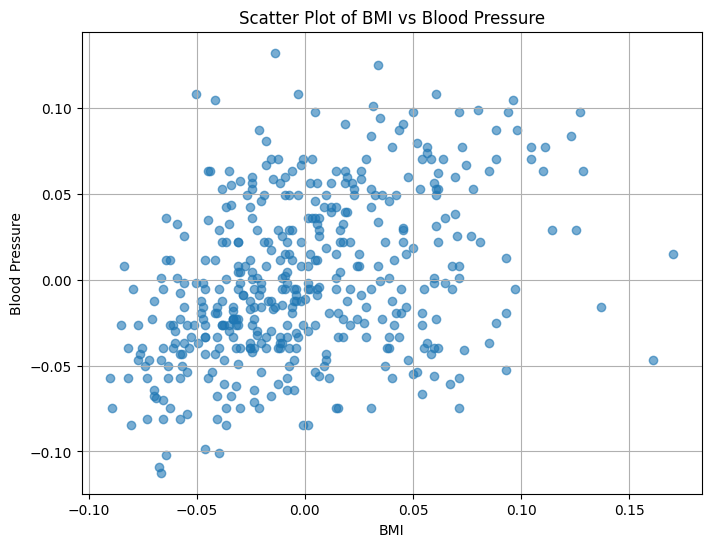

In [171]:
# Step 3: Create a scatter plot of 'bmi' vs 'bp'
plt.figure(figsize=(8, 6))
plt.scatter(df_diabetics['bmi'], df_diabetics['bp'], alpha=0.6)
plt.title('Scatter Plot of BMI vs Blood Pressure')
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.grid(True)
plt.show()


**Summary:-**
According to the graph above can summarize that most of the data points are in the bottom left corner of the graph but there are few points that are exactly opposite that is the top right corner of the graph. Those points in the top right corner can be regarded as Outliers.
Using approximation can say all those data points that are x>20 and y>600 are outliers.

#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [172]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_diabetics['age']))
print(z)

[0.80050009 0.03956713 1.79330681 1.87244107 0.11317236 1.94881082
 0.9560041  1.33508832 0.87686984 1.49059233 2.02518057 0.57139085
 0.34228161 0.11317236 0.95323959 1.1087436  0.11593688 1.48782782
 0.80326461 0.57415536 1.03237385 1.79607132 1.79607132 0.95323959
 1.33785284 1.41422259 2.25428981 0.49778562 1.10597908 1.41145807
 1.26148309 0.49778562 0.72413034 0.6477606  0.34228161 1.02960933
 0.26591186 0.19230663 0.03956713 0.03956713 0.11317236 2.10155031
 1.26148309 0.41865135 0.95323959 0.57139085 1.18511334 1.64333183
 1.41145807 0.87963435 0.72413034 1.25871858 1.1087436  0.19230663
 1.03237385 0.87963435 0.87963435 0.57415536 0.87686984 1.33508832
 1.49059233 0.87963435 0.57415536 0.72689486 1.41145807 0.9560041
 0.19230663 0.87686984 0.80050009 0.34228161 0.03956713 0.03956713
 1.33508832 0.26591186 0.26591186 0.19230663 0.65052511 2.02518057
 0.11317236 2.17792006 1.48782782 0.26591186 0.34504612 0.80326461
 0.03680262 0.95323959 1.49059233 0.95323959 1.1087436  0.95600

Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [173]:
# Get the indices where the Z-score is greater than 2
outlier_indices = np.where(z > 2)[0]
# Display the rows in df_diabetics where Z > 2
df_diabetics.iloc[outlier_indices]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
10,-0.096328,-0.044642,-0.083808,0.008101,-0.103389,-0.090561,-0.013948,-0.076395,-0.062917,-0.034215
26,-0.107226,-0.044642,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042571,-0.005220
41,-0.099961,-0.044642,-0.067641,-0.108956,-0.074494,-0.072712,0.015505,-0.039493,-0.049872,-0.009362
77,-0.096328,-0.044642,-0.036385,-0.074527,-0.038720,-0.027618,0.015505,-0.039493,-0.074093,-0.001078
79,-0.103593,-0.044642,-0.037463,-0.026328,0.002559,0.019980,0.011824,-0.002592,-0.068332,-0.025930
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920
131,-0.096328,-0.044642,-0.069797,-0.067642,-0.019456,-0.010708,0.015505,-0.039493,-0.046883,-0.079778
204,0.110727,0.050680,0.006728,0.028758,-0.027712,-0.007264,-0.047082,0.034309,0.002004,0.077622
223,-0.099961,-0.044642,-0.023451,-0.064199,-0.057983,-0.060186,0.011824,-0.039493,-0.018114,-0.050783
226,-0.103593,0.050680,-0.046085,-0.026328,-0.024960,-0.024800,0.030232,-0.039493,-0.039809,-0.054925


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [174]:
# Calculate IQR for the 'bmi' column
Q1 = df_diabetics['bmi'].quantile(0.25)
Q3 = df_diabetics['bmi'].quantile(0.75)
IQR = Q3 - Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

Q1: -0.03422906805670789
Q3: 0.031248015431550695
IQR: 0.06547708348825859


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [175]:
# Calculate the upper and lower bounds for outlier detection using IQR
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
print("Upper bound:", upper)
print("Lower bound:", lower)

Upper bound: 0.1294636406639386
Lower bound: -0.13244469328909578


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

### Summary:

We looked at the data to find values that are very different from most others, these are called outliers. For example, with the bmi numbers, we found a range where most of the values usually fall. Anything outside this range might be unusual or errors.

We also checked the age numbers to see how far each one is from the average age. If an age is too far away, it might be an outlier.

Finding these unusual values is important because they can affect how well we understand and use the data later. So, spotting and dealing with outliers helps make the data cleaner and more reliable.